Saving edbe73998375dbd76c83924f15c880aa.jpg to edbe73998375dbd76c83924f15c880aa.jpg


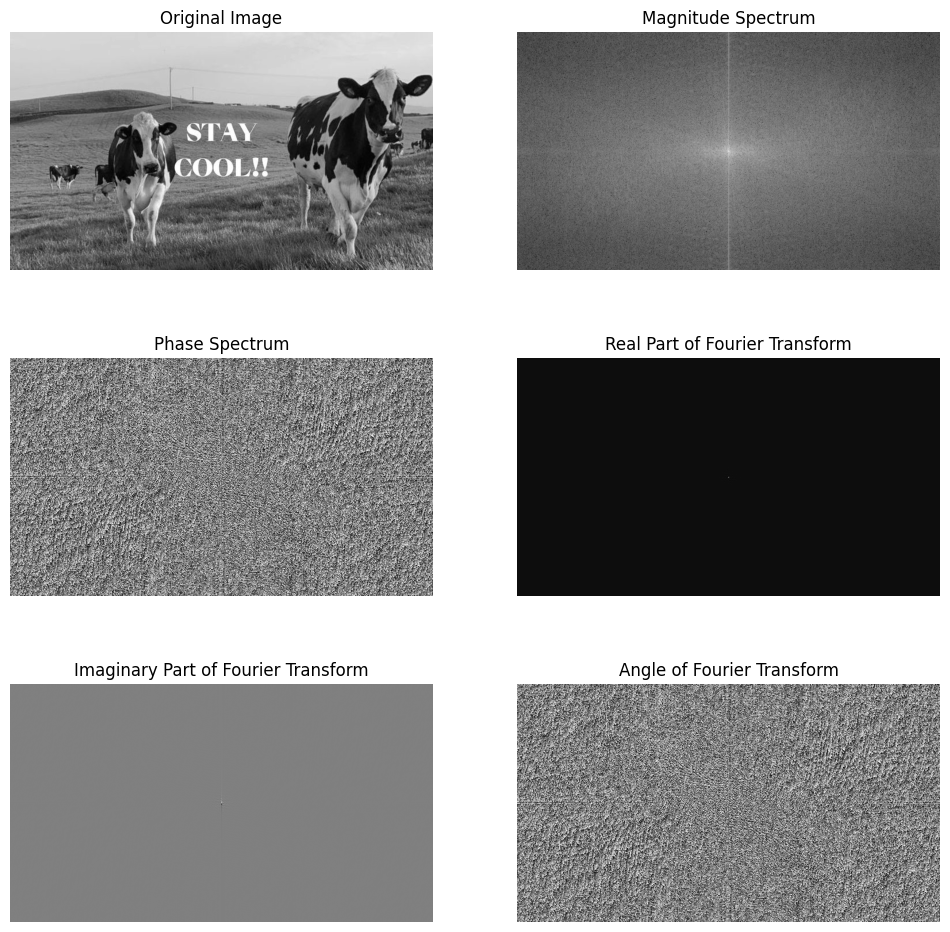

In [7]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def visualize_frequency_components(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply 2D Fourier Transform
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Calculate magnitude spectrum
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

    # Calculate phase spectrum
    phase_spectrum = np.angle(f_transform_shifted)

    # Display the original image and frequency components using matplotlib
    plt.figure(figsize=(12, 12))

    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.axis('off')

    plt.subplot(3, 2, 3)
    plt.imshow(phase_spectrum, cmap='gray')
    plt.title('Phase Spectrum')
    plt.axis('off')

    plt.subplot(3, 2, 4)
    plt.imshow(np.real(f_transform_shifted), cmap='gray')
    plt.title('Real Part of Fourier Transform')
    plt.axis('off')

    plt.subplot(3, 2, 5)
    plt.imshow(np.imag(f_transform_shifted), cmap='gray')
    plt.title('Imaginary Part of Fourier Transform')
    plt.axis('off')

    plt.subplot(3, 2, 6)
    plt.imshow(np.angle(f_transform_shifted), cmap='gray')
    plt.title('Angle of Fourier Transform')
    plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Visualize frequency components
visualize_frequency_components(image_path)


Saving edbe73998375dbd76c83924f15c880aa.jpg to edbe73998375dbd76c83924f15c880aa (1).jpg


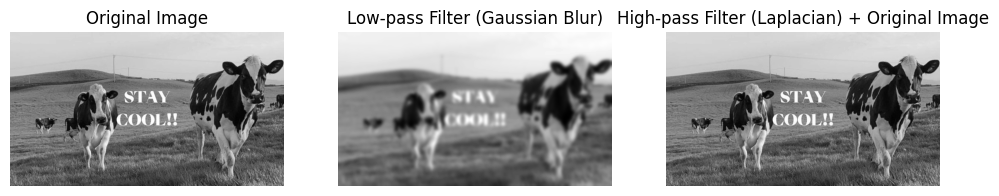

In [8]:
import cv2
import numpy as np
from google.colab import files
from matplotlib import pyplot as plt

def enhance_image(image_path, kernel_size=15, alpha=1.5):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply low-pass filter using Gaussian blur
    blurred_image = cv2.GaussianBlur(gray_image, (kernel_size, kernel_size), 0)

    # Apply high-pass filter using Laplacian
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
    enhanced_image = gray_image + alpha * laplacian

    # Clip pixel values to the valid range [0, 255]
    enhanced_image = np.clip(enhanced_image, 0, 255).astype(np.uint8)

    # Display the original and enhanced images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title('Low-pass Filter (Gaussian Blur)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title('High-pass Filter (Laplacian) + Original Image')
    plt.axis('off')

    plt.show()

# Upload an image to Google Colab
uploaded = files.upload()

# Get the path of the uploaded image
image_path = list(uploaded.keys())[0]

# Specify the kernel size for the Gaussian blur (adjust as needed)
kernel_size = 25

# Specify the alpha parameter for controlling the strength of the high-pass filter
alpha = 0.5

# Apply low-pass and high-pass filters for image enhancement and display the results
enhance_image(image_path, kernel_size, alpha)
